In [1]:
# Loading useful libraries

import os
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split

In [2]:
# Defined constants

images_directory="images"
masked_directory="masked"
source_path="masked-dataset"

In [3]:
# Creating Custom Dataset

class CustomDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.image_list = os.listdir(self.image_dir)
    
    def __len__(self):
        return len(self.image_list)
    
    def __getitem__(self, index):
        image_path = os.path.join(self.image_dir, self.image_list[index])
        mask_path = os.path.join(self.mask_dir, self.image_list[index].replace('.jpg', '.png'))
        
        
#       Making sure that the images and masks are properly loaded before transformation
        with open(image_path, 'rb') as image_file:
            image = Image.open(image_file).convert('RGB')
        
        with open(mask_path, 'rb') as mask_file:
            mask = Image.open(mask_file).convert('RGB')
            
        if self.transform is not None:
            image = self.transform(image)
            mask = self.transform(mask)
        
#         Return the input images and anotated masked images

        returnDataset = {
            'input_image': image, 
            'annotated_mask': mask
        }
        
        return returnDataset

In [4]:
# Loading default directories

dataset_dir = source_path
image_dir = os.path.join(dataset_dir, images_directory)
mask_dir = os.path.join(dataset_dir, masked_directory)

In [5]:
# Using transformm for resizing and converting images  to tensors

transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
])

In [6]:
# Loading custom dataset

custom_dataset = CustomDataset(image_dir, mask_dir, transform)

In [7]:
# Spliting dataset into 80% training, 10% validation and 10% testing 

train_size = int(0.8 * len(custom_dataset))
val_size = int(0.1 * len(custom_dataset))
test_size = len(custom_dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(custom_dataset, [train_size, val_size, test_size])

Image of Mini batch


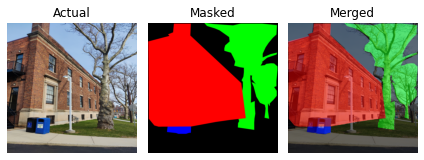

Image of Mini batch


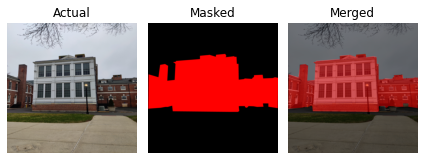

Image of Mini batch


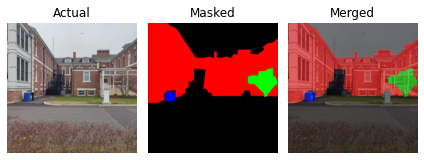

Image of Mini batch


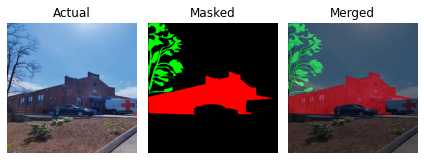

Image of Mini batch


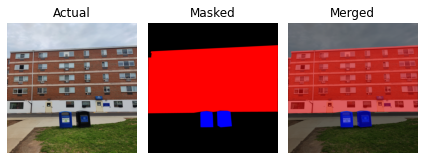

Image of Mini batch


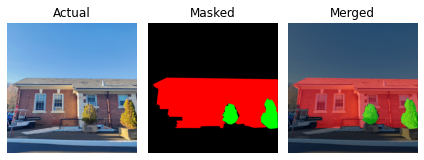

Image of Mini batch


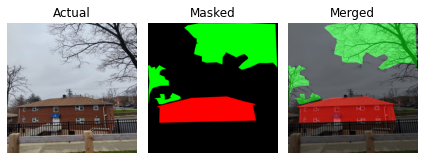

Image of Mini batch


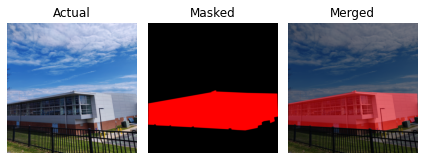

Image of Mini batch


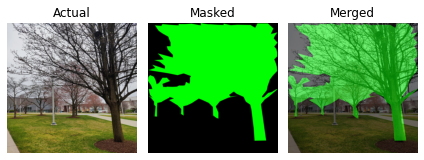

Image of Mini batch


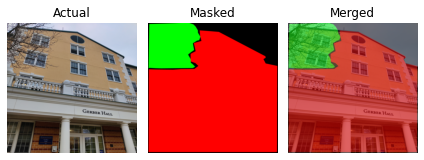

Image of Mini batch


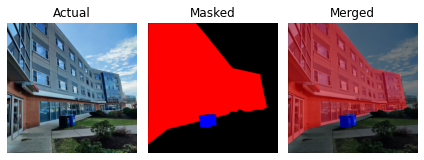

Image of Mini batch


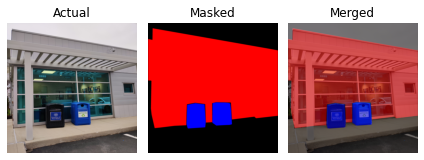

Image of Mini batch


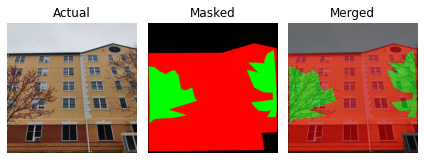

In [8]:
batch_size = 8

# Creating dataloaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size) # to be used later

# Visualizing the 1st sample of each minibatch of size 8.
for batch_idx, batch in enumerate(train_loader):
    input_images = batch['input_image']
    annotated_masks = batch['annotated_mask']
    
    print(f"Image of Mini batch")
        
    # Plotting the original input image
    plt.subplot(1, 3, 1)
    plt.imshow(transforms.ToPILImage()(input_images[0]))
    plt.axis('off')
    plt.title('Actual')

    # Plotting the annotated mask
    plt.subplot(1, 3, 2)
    plt.imshow(transforms.ToPILImage()(annotated_masks[0]))
    plt.axis('off')
    plt.title('Masked')

    # Plotting the merged image
    plt.subplot(1, 3, 3)
    plt.imshow(transforms.ToPILImage()(input_images[0]))
    plt.imshow(transforms.ToPILImage()(annotated_masks[0]), alpha=0.5)
    plt.axis('off')
    plt.title('Merged')
    
    plt.tight_layout()
    plt.show()